In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancelled = pd.read_excel('Cancelled Appointments Last 3 years with Demographic Information Revised With County of Service.xlsx')
cancelled.head()

,OptionsNumber,StartDate,Duration,AppointmentStatus,AgeAtAppointment,Gender,Ethnicity,PrimaryLanguage,Religion,County
0,89175,2021-07-01 01:00:00,61,No Show/Client,17,M,Black,English,[Not Entered],Los Angeles
1,61751,2021-07-01 08:00:00,90,Provider Cx,27,F,Hispanic/Latino,Spanish,[Not Entered],Ventura
2,62043,2021-07-01 08:45:00,120,No Show/Client,17,F,White,English,[Not Entered],Stanislaus
3,57251,2021-07-01 09:00:00,120,Other Agency Cxl,16,M,Hispanic/Latino,English,[Not Entered],Merced
4,60712,2021-07-01 09:00:00,60,Provider Cx,1,M,Hispanic/Latino,English,[Not Entered],Stanislaus


In [3]:
incidents = pd.read_excel('Incidents Last 3 years with Demographic Information Revised With County of Service.xlsx')
incidents.head()

,IncidentDate,IncidentTypeCode,IncidentType,SubTypeCode,IncidentSubType,OptionsNumber,AgeAtIncident,Gender,Ethnicity,PrimaryLanguage,Religion,ServiceDivision,CountyOService
0,2022-02-01,6,Epidemic Outbreak,NaN,NaN,77036,13,F,White,English,Non-Denominational,Foster Care,FRESNO DSS
1,2022-11-26,6,Epidemic Outbreak,NaN,NaN,77036,13,F,White,English,Non-Denominational,Foster Care,FRESNO DSS
2,2022-11-26,6,Epidemic Outbreak,NaN,NaN,77037,15,F,White,English,No Preference,Foster Care,FRESNO DSS
3,2022-02-01,6,Epidemic Outbreak,NaN,NaN,77037,14,F,White,English,No Preference,Foster Care,FRESNO DSS
4,2022-07-06,2,Unusual Incident,5.0,ER Visit,78745,13,F,Hispanic/Latino,English,No Preference,Foster Care,FRESNO DSS


In [4]:
demographic = pd.read_excel('Demographic Query Last 3 Years.xlsx')
demographic.head()

,OptionsNumber,Gender,AgeAtStart,Ethnicity,PrimaryLanguage,Religion,ServiceDivision,CountyofService,DOP,DOD
0,8425,F,5,[Not Entered],[Not Entered],[Not Entered],Behavioral Health,ZBH-Stan Co. Outpatient (Do not use),2010-07-21 00:00:00,NaT
1,13081,M,11,[Not Entered],[Not Entered],[Not Entered],Behavioral Health,ZBH-Stan Co. Outpatient (Do not use),2011-09-13 00:00:00,NaT
2,14959,F,16,Hispanic/Latino,English,[Not Entered],Behavioral Health,ZBH-Stan Co. Outpatient (Do not use),2013-11-08 00:00:00,NaT
3,15113,F,15,[Not Entered],English,[Not Entered],Behavioral Health,ZBH-Stan Co. Outpatient (Do not use),2013-12-04 00:00:00,NaT
4,16063,F,22,Black,English,No Preference,Transitional,SAN JOAQUIN DSS,2022-09-02 07:00:00,NaT


In [5]:
cans = pd.read_excel('Cancelled Appointments Last 3 years with Demographic Information Revised With County of Service.xlsx')
cans.head()

,OptionsNumber,StartDate,Duration,AppointmentStatus,AgeAtAppointment,Gender,Ethnicity,PrimaryLanguage,Religion,County
0,89175,2021-07-01 01:00:00,61,No Show/Client,17,M,Black,English,[Not Entered],Los Angeles
1,61751,2021-07-01 08:00:00,90,Provider Cx,27,F,Hispanic/Latino,Spanish,[Not Entered],Ventura
2,62043,2021-07-01 08:45:00,120,No Show/Client,17,F,White,English,[Not Entered],Stanislaus
3,57251,2021-07-01 09:00:00,120,Other Agency Cxl,16,M,Hispanic/Latino,English,[Not Entered],Merced
4,60712,2021-07-01 09:00:00,60,Provider Cx,1,M,Hispanic/Latino,English,[Not Entered],Stanislaus


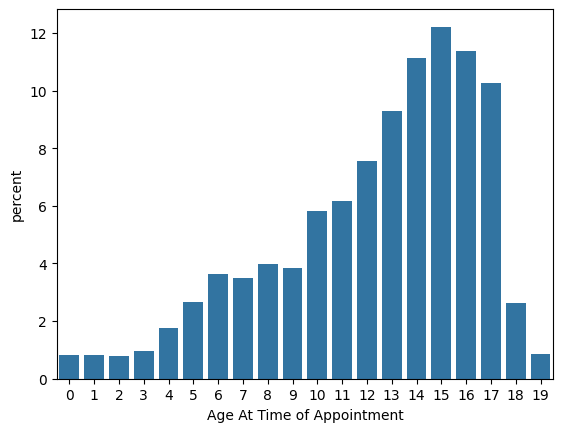

In [10]:
# Age Associated with Cancelled Appointments

top_20 = cancelled['AgeAtAppointment'].value_counts()[:20]
top_20_ages = np.array(top_20.index)

ages_subset = cancelled[cancelled['AgeAtAppointment'].isin(top_20_ages)]
sns.countplot(data = ages_subset, x = 'AgeAtAppointment', stat = 'percent')
plt.xlabel('Age At Time of Appointment');

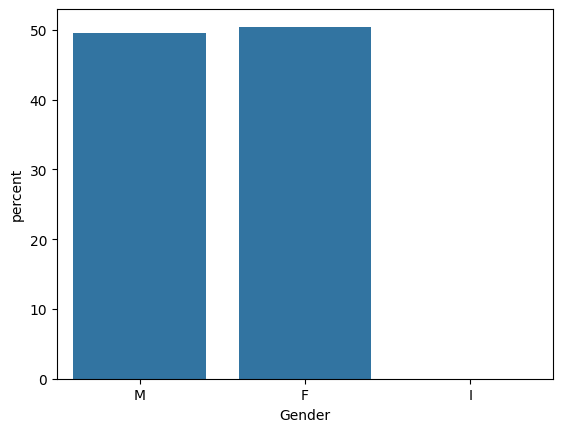

In [9]:
# Gender Associated with Cancelled Appointments
sns.countplot(data = cancelled, x = 'Gender', stat = 'percent');

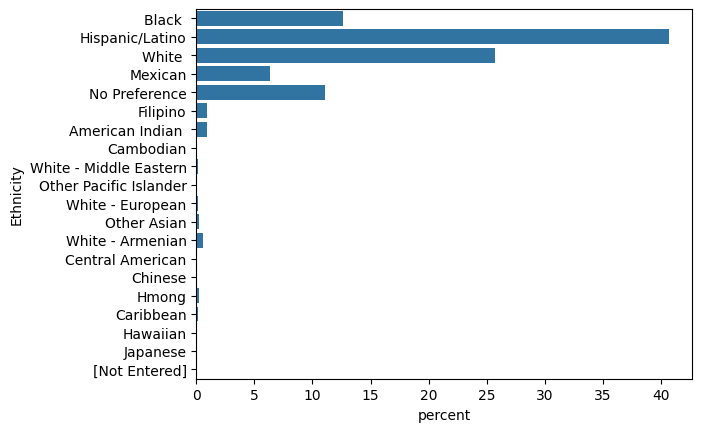

In [11]:
# Ethnicity Associated with Cancelled Appointments

top_20_race = cancelled['Ethnicity'].value_counts()[:20]
top_20_ethnicity = np.array(top_20_race.index)

ethnicity_subset = cancelled[cancelled['Ethnicity'].isin(top_20_ethnicity)]
sns.countplot(data = ethnicity_subset, y = 'Ethnicity', stat = 'percent');

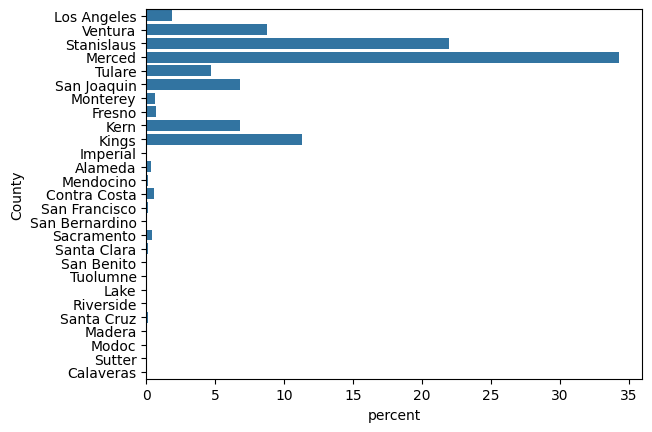

In [12]:
# Location Associated with Cancelled Appointments

sns.countplot(data = cancelled, y = 'County', stat = 'percent');

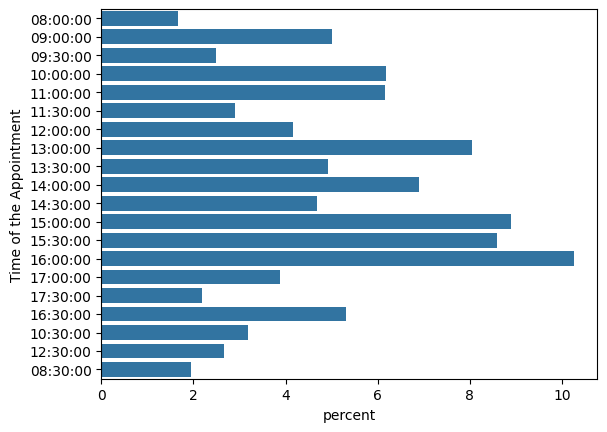

In [13]:
# Start Time (in the Day) Associated with Cancelled Appointments

cancelled['StartDate'] = cancelled['StartDate'].astype(str)
cancelled['StartTime'] = cancelled['StartDate'].str.extract('(\d+:\d+:\d+)')

top_20_starts = cancelled['StartTime'].value_counts()[:20]
top_20_starts_arr = np.array(top_20_starts.index)

time_subset = cancelled[cancelled['StartTime'].isin(top_20_starts_arr)]
sns.countplot(data = time_subset, y = 'StartTime', stat = 'percent')
plt.ylabel('Time of the Appointment');

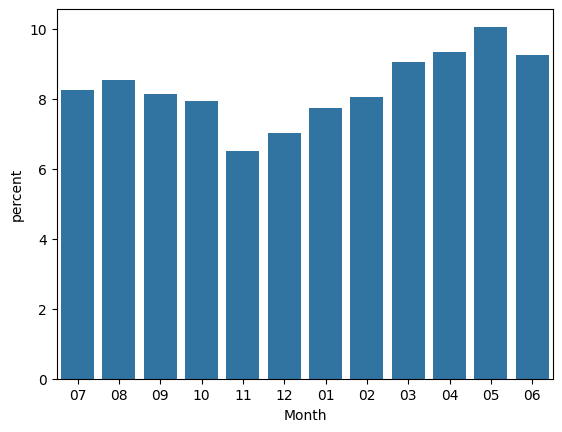

In [14]:
# Month Associated with Cancelled Appointments

cancelled['Month'] = cancelled['StartDate'].str.extract('\d{4}-(\d+)-')
sns.countplot(data = cancelled, x = 'Month', stat = 'percent');